In [1]:
import os
import pandas as pd 
import numpy as np
import statsmodels.api as sm

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
import pandas as pd

In [4]:
dfX = pd.DataFrame(boston.data, columns=boston.feature_names)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])
boston = pd.concat([dfX, dfy], axis=1)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


ㅇ 데이터 설명

In [7]:
'''
타겟 데이터
1978 보스턴 주택 가격
506개 타운의 주택 가격 중앙값 (단위 1,000 달러)

특징 데이터
CRIM: 범죄율
INDUS: 비소매상업지역 면적 비율
NOX: 일산화질소 농도
RM: 주택당 방 수
LSTAT: 인구 중 하위 계층 비율
B: 인구 중 흑인 비율
PTRATIO: 학생/교사 비율
ZN: 25,000 평방피트를 초과 거주지역 비율
CHAS: 찰스강의 경계에 위치한 경우는 1, 아니면 0
AGE: 1940년 이전에 건축된 주택의 비율
RAD: 방사형 고속도로까지의 거리
DIS: 직업센터의 거리
TAX: 재산세율
MEDV : 본인이 소유한 주택 가격'''

'\n타겟 데이터\n1978 보스턴 주택 가격\n506개 타운의 주택 가격 중앙값 (단위 1,000 달러)\n\n특징 데이터\nCRIM: 범죄율\nINDUS: 비소매상업지역 면적 비율\nNOX: 일산화질소 농도\nRM: 주택당 방 수\nLSTAT: 인구 중 하위 계층 비율\nB: 인구 중 흑인 비율\nPTRATIO: 학생/교사 비율\nZN: 25,000 평방피트를 초과 거주지역 비율\nCHAS: 찰스강의 경계에 위치한 경우는 1, 아니면 0\nAGE: 1940년 이전에 건축된 주택의 비율\nRAD: 방사형 고속도로까지의 거리\nDIS: 직업센터의 거리\nTAX: 재산세율'

#  crim/rm/lstat 세게의 변수로 각각 단순 선형 회귀 분석하기

In [5]:
target = boston[['MEDV']]
# boston_target
crim=boston[['CRIM']]
rm=boston[['RM']]
lstat=boston['LSTAT']

# MEDV ~ crim 선형회귀분석


In [6]:
# statsmodels 패키지는 상수항 결합을 위한 add_constant 함수를 제공한다.
# 데이터프레임을 만들 때 데이터 행이 하나인 경우에는 add_constant에 has_constant="add" 인수를 추가해야 한다.
# crim 변수에 상수항 추가하기 (항상 추가해줘야한다)
crim1 = sm.add_constant(crim, has_constant='add')

C:\Users\nowks\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [7]:
model1 = sm.OLS(target,crim1) #회귀분석을 적합 (y값, data)
fitted_model1=model1.fit() #fitting 을 시켜줘야 회귀분석이 됨


In [8]:
#summary 함수를 통해 결과 출력
fitted_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     89.49
Date:                Tue, 26 May 2020   Prob (F-statistic):           1.17e-19
Time:                        00:29:52   Log-Likelihood:                -1798.9
No. Observations:                 506   AIC:                             3602.
Df Residuals:                     504   BIC:                             3610.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.0331      0.409     58.740      0.000      23.229      24.837
CRIM          -0.4152      0.044     -9.460      0.000      -0.501      -0.329
==============================================================================
Omnibus:                      139.832   Durbin-Watson:                   0.713
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              295.404
Skew:                           1.490   Prob(JB):                     7.14e-65
Kurtosis:                       5.264   Cond. No.                         10.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
#회귀 계수
fitted_model1.params   # 범죄율이 1일때 집갑은 -0.415만큼 감소

const    24.033106
CRIM     -0.415190
dtype: float64

In [11]:
#predict 함수를 통해 yhat 구하기
pred1 = fitted_model1.predict(crim1)
print(pred1)

0      24.030482
1      24.021767
2      24.021776
3      24.019666
4      24.004437
         ...    
501    24.007103
502    24.014311
503    24.007879
504    23.987605
505    24.013422
Length: 506, dtype: float64


# 적합시킨 직선 시각화

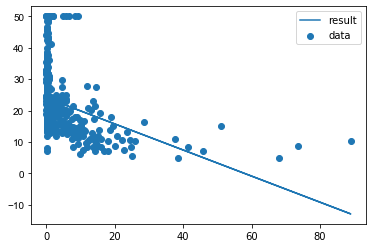

In [20]:
import matplotlib.pyplot as plt
plt.yticks(fontname = "Arial") 
plt.scatter(crim,target,label="data")  # 범죄와 집값의 관계 (x,y)
plt.plot(crim,pred1,label="result")  #yhat 선 
plt.legend() # 범례 표시
plt.show()
# 왼쪽 위에 부분이 잘 안맞음. 어쨋든 음의 상관관계는 가진다.

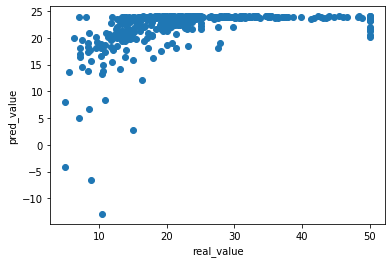

In [21]:
plt.scatter(target,pred1)
plt.xlabel("real_value")
plt.ylabel("pred_value")
plt.show()
# 실제값과 예측값이 얼마나 나타낸건가 본 건데 잘 안맞음

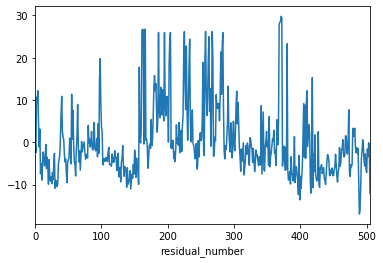

In [23]:
# 잔차(residual 시각화)
fitted_model1.resid.plot()
plt.xlabel("residual_number")
plt.show()
# 잔차도 균일하게 분포해있다고 보기 어렵다. 즉. 범죄율 가지고 집 값 예측하기 좀 그렇다.

In [24]:
##잔차의 합계산해보기
# 잔차의 합이 거의 0이 됨. 
sum(fitted_model1.resid)

-2.717825964282383e-13